In [2]:
# explore SANBS data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from datetime import timedelta
from datetime import datetime

In [3]:
df=pd.read_csv("../1_data/private/SANBS Donations (3 Nov 2022).csv")

C:\Users\jagir\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
df.head(5)

,DonorID,Visit_Date,Visit_yr,Visit_Mo,donation_time,Visit_Age,sex,Fixed,MobileID,donation_product,...,race_group,race,Ferritin,category,DefCode,Def_start,Def_end,Deferral_permanent,EffectiveYr,EffectiveMo
0,18353,2017-06-19 00:00:00.000,2017.0,6.0,1225.0,40.9,M,Fixed Clinic,FJD001,WB,...,1,White,0.0,NaN,NaN,NaN,NaN,NoDeferral,NaN,NaN
1,18353,2018-07-03 00:00:00.000,2018.0,7.0,930.0,41.9,M,Fixed Clinic,FJD001,WB,...,1,White,0.0,NaN,NaN,NaN,NaN,NoDeferral,NaN,NaN
2,18353,2018-09-13 00:00:00.000,2018.0,9.0,1118.0,42.1,M,Fixed Clinic,FJD001,WB,...,1,White,0.0,NaN,NaN,NaN,NaN,NoDeferral,NaN,NaN
3,18353,2018-11-20 00:00:00.000,2018.0,11.0,1137.0,42.3,M,Fixed Clinic,FJD001,WB,...,1,White,0.0,NaN,NaN,NaN,NaN,NoDeferral,NaN,NaN
4,18353,2019-01-26 00:00:00.000,2019.0,1.0,1240.0,42.5,M,Fixed Clinic,FJD001,WB,...,1,White,0.0,NaN,NaN,NaN,NaN,NoDeferral,NaN,NaN


In [48]:
#percentage missing values in each column
percent_missing = df.isna().sum() * 100 / len(df)
percent_missing

DonorID                    0.000000
Visit_Date                 0.000046
Visit_yr                   0.000046
Visit_Mo                   0.000046
donation_time              0.000046
Visit_Age                  0.000046
sex                        0.000046
Fixed                      0.000046
MobileID                   0.000046
donation_product           0.000046
DonProc                    0.226787
Outcome                    0.004049
ABO_RH                     0.000846
Disease_marker_results     0.000046
HB_Value                  25.821441
race_group                 0.000046
race                       0.000046
Ferritin                   0.000046
category                  90.172221
DefCode                   90.172221
Def_start                 90.172221
Def_end                   90.172221
Deferral_permanent         0.000046
EffectiveYr               90.172221
EffectiveMo               90.172221
VISIT_moyr                 0.000000
dtype: float64

In [9]:
#data type of each column
df.dtypes

DonorID                    object
Visit_Date                 object
Visit_yr                  float64
Visit_Mo                  float64
donation_time             float64
Visit_Age                 float64
sex                        object
Fixed                      object
MobileID                   object
donation_product           object
DonProc                    object
Outcome                    object
ABO_RH                     object
Disease_marker_results     object
HB_Value                  float64
race_group                 object
race                       object
Ferritin                  float64
category                   object
DefCode                    object
Def_start                  object
Def_end                    object
Deferral_permanent         object
EffectiveYr               float64
EffectiveMo               float64
dtype: object

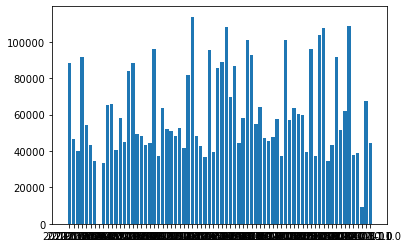

,VISIT_moyr
2021.0-8.0,88182
2019.0-9.0,46670
2017.0-9.0,39921
2022.0-6.0,91597
2019.0-5.0,54315
...,...
2018.0-2.0,37890
2017.0-3.0,38699
2022.0-11.0,9352
2021.0-1.0,67394


In [51]:
df.dropna(subset=['Visit_yr', 'Visit_Mo'])

#concatenate year and month- convert to datetime format 
#plot number of donation per month/year

df["Visit_Date"] = df["Visit_Date"].astype("datetime64")
df['VISIT_moyr']=(df["Visit_yr"].astype(str)  + "-" + df["Visit_Mo"].astype(str)) 
    #df.groupby([df['Visit_Mo'], df['Visit_yr']]).count().plot(kind="bar")

counts = df['VISIT_moyr'].value_counts(sort=False)
count_df=pd.DataFrame(data=counts)
plt.bar(counts.index,counts)
plt.show()
count_df

Plotting for column Visit_yr


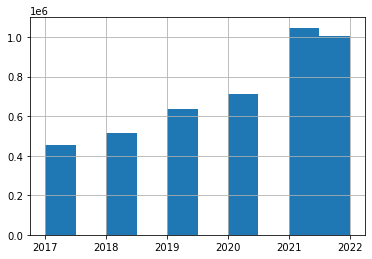

Plotting for column Visit_Mo


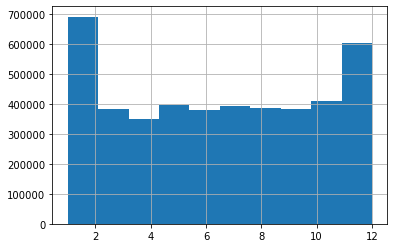

Plotting for column donation_time


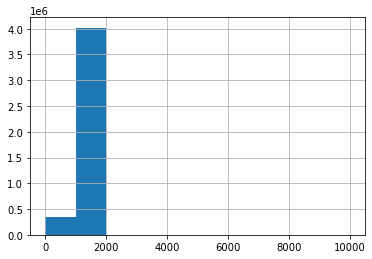

Plotting for column Visit_Age


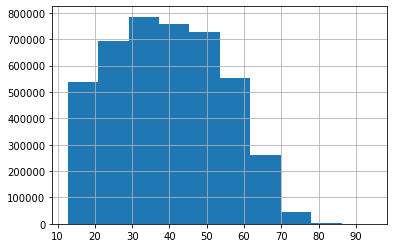

Plotting for column HB_Value


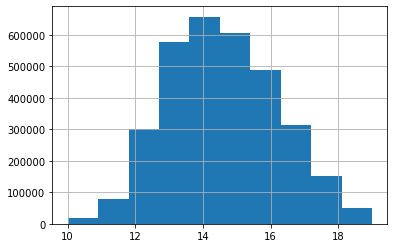

Plotting for column Ferritin


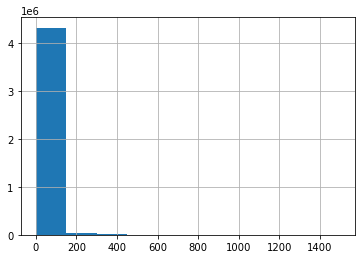

Plotting for column EffectiveYr


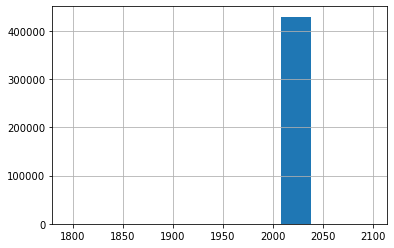

Plotting for column EffectiveMo


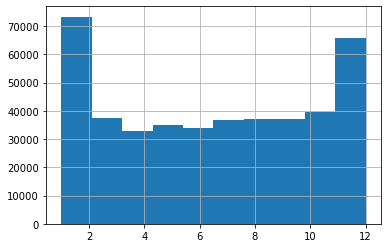

In [65]:
# distribution of each column of datatype float and int
df_num = df.select_dtypes(include = ['float64', 'int64'])
for col in df_num.columns:
    hist = df[col].hist()
    print("Plotting for column {}".format(col))
    plt.show()

C:\Users\jagir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Plotting for column sex


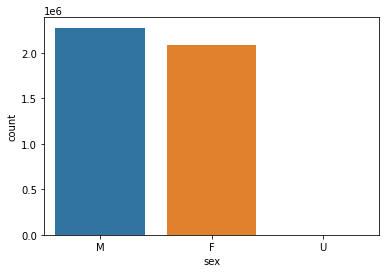

C:\Users\jagir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Plotting for column Fixed


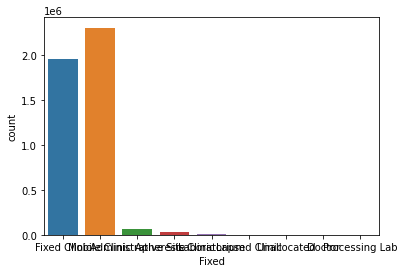

C:\Users\jagir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Plotting for column DonProc


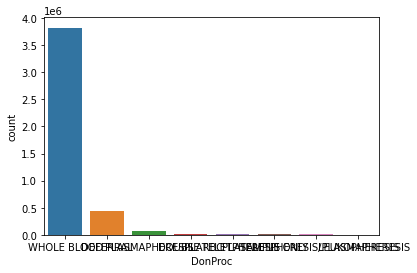

C:\Users\jagir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Plotting for column Outcome


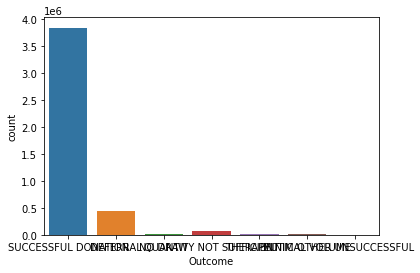

C:\Users\jagir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Plotting for column ABO_RH


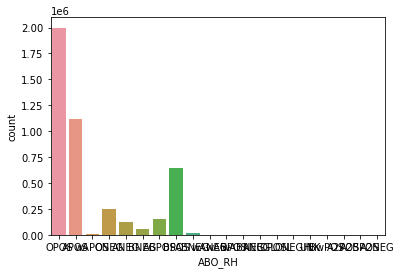

C:\Users\jagir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Plotting for column Disease_marker_results


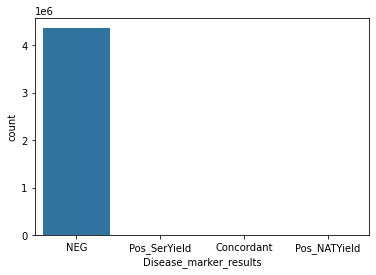

C:\Users\jagir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Plotting for column race


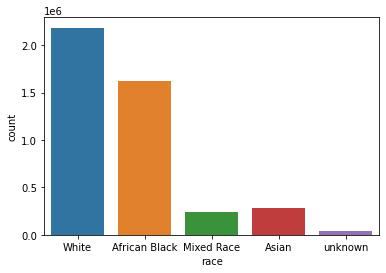

C:\Users\jagir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Plotting for column category


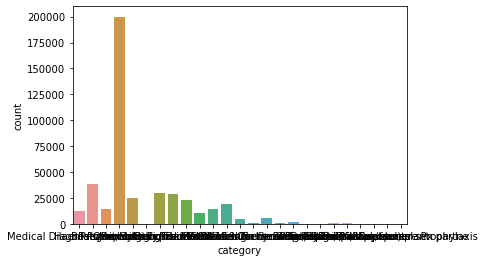

C:\Users\jagir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Plotting for column DefCode


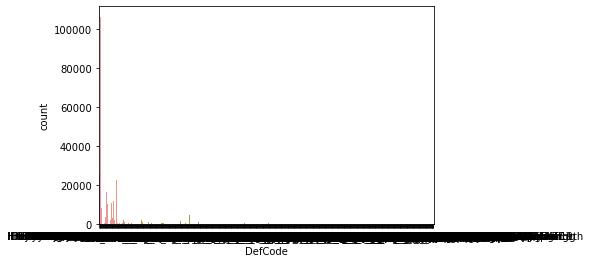

C:\Users\jagir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Plotting for column Deferral_permanent


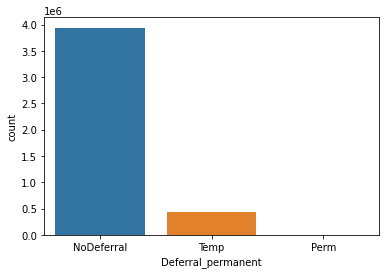

In [5]:
# counts of each column 
df_obj = df.select_dtypes(include = ['object'])
for col in df_obj.columns:
    if col in ['Def_start', 'Def_end', 'DonorID', 'MobileID', 'Visit_Date', 'donation_product', 'race_group', 'EffectiveYr', "EffectiveMo"]:
        continue
    col_count=df[col]
    sns.countplot(col_count)
    print("Plotting for column {}".format(col))
    plt.show()
